<a href="https://colab.research.google.com/github/Amrit-Sharma-7/GoogleQueryAnalyzer/blob/main/code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Content

100 Destinations

2 Keyword variations (flights to destination and tickets to destination)

2 Countries

10 Results each

=> 4,000 rows


The same data set is produced every 15 days, in order to track the changes in ranks over time. Each file represents a point in time (either the 1st or the 15th of the month)

In [2]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/College_Projects/Major & Mini Project/MyprojectT11/Google Search Analysis/data/flights_tickets_serp2018-12-16.csv")
df.head(3)

,searchTerms,rank,title,snippet,displayLink,link,queryTime,totalResults,cacheId,formattedUrl,...,count,startIndex,inputEncoding,outputEncoding,safe,cx,gl,searchTime,formattedSearchTime,formattedTotalResults
0,flights to hong kong,1,Cheap Flights to Hong Kong (HKG) from $397 - K...,"Find flights to Hong Kong on XiamenAir, Hong K...",www.kayak.com,https://www.kayak.com/flight-routes/United-Sta...,2018-12-16 11:26:30.485612+00:00,106000000,W42baDpas_gJ,https://www.kayak.com/flight-routes/United.../...,...,10,1,utf8,utf8,off,012859022920491477448:pubdbfjmmec,us,0.162895,0.16,"106,000,000"
1,flights to hong kong,2,"$480 Flights to Hong Kong, China (HKG) - TripA...",Cheap Flights to Hong Kong: Enter your dates o...,www.tripadvisor.com,https://www.tripadvisor.com/Flights-g294217-Ho...,2018-12-16 11:26:30.485612+00:00,106000000,5jsjhmxgxvkJ,https://www.tripadvisor.com/Flights-g294217-Ho...,...,10,1,utf8,utf8,off,012859022920491477448:pubdbfjmmec,us,0.162895,0.16,"106,000,000"
2,flights to hong kong,3,Cheap Flights to Hong Kong International from ...,Search cheap flights using Skyscanner's free f...,www.skyscanner.com,https://www.skyscanner.com/flights-to/hkg/chea...,2018-12-16 11:26:30.485612+00:00,106000000,EI78TI4Q1qYJ,https://www.skyscanner.com/flights-to/hkg/chea...,...,10,1,utf8,utf8,off,012859022920491477448:pubdbfjmmec,us,0.162895,0.16,"106,000,000"


In [ ]:
df.describe()


,rank,totalResults,count,startIndex,searchTime,formattedSearchTime
count,4000.00000,4.000000e+03,4000.0,4000.0,4000.000000,4000.000000
mean,5.50000,5.538642e+07,10.0,1.0,0.321426,0.321350
std,2.87264,8.004667e+07,0.0,0.0,0.061791,0.062045
min,1.00000,9.940000e+04,10.0,1.0,0.162895,0.160000
25%,3.00000,9.217500e+06,10.0,1.0,0.278504,0.280000
50%,5.50000,2.300000e+07,10.0,1.0,0.314640,0.310000
75%,8.00000,7.097500e+07,10.0,1.0,0.354942,0.352500
max,10.00000,5.420000e+08,10.0,1.0,0.533649,0.530000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   searchTerms            4000 non-null   object 
 1   rank                   4000 non-null   int64  
 2   title                  4000 non-null   object 
 3   snippet                4000 non-null   object 
 4   displayLink            4000 non-null   object 
 5   link                   4000 non-null   object 
 6   queryTime              4000 non-null   object 
 7   totalResults           4000 non-null   int64  
 8   cacheId                3975 non-null   object 
 9   formattedUrl           4000 non-null   object 
 10  htmlFormattedUrl       4000 non-null   object 
 11  htmlSnippet            4000 non-null   object 
 12  htmlTitle              4000 non-null   object 
 13  kind                   4000 non-null   object 
 14  pagemap                3996 non-null   object 
 15  cseN

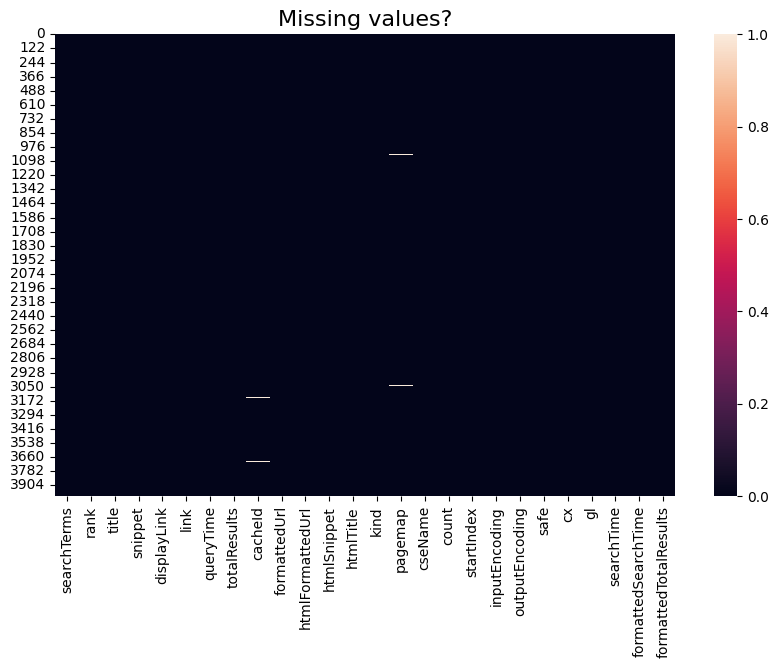

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull())
plt.title("Missing values?",fontsize = 16)
plt.show()

In [ ]:
# Let's have a more accurate look at the missing values
df.isnull().sum()

searchTerms               0
rank                      0
title                     0
snippet                   0
displayLink               0
link                      0
queryTime                 0
totalResults              0
cacheId                  25
formattedUrl              0
htmlFormattedUrl          0
htmlSnippet               0
htmlTitle                 0
kind                      0
pagemap                   4
cseName                   0
count                     0
startIndex                0
inputEncoding             0
outputEncoding            0
safe                      0
cx                        0
gl                        0
searchTime                0
formattedSearchTime       0
formattedTotalResults     0
dtype: int64

In [ ]:
s = df["searchTerms"].nunique()
r = df["rank"].nunique()
print(f"Number of search terms: {s}\nNumber of ranks: {r}\nNumber of entries: {df.shape[0]}")

Number of search terms: 200
Number of ranks: 10
Number of entries: 4000


Which websites get more traffic?

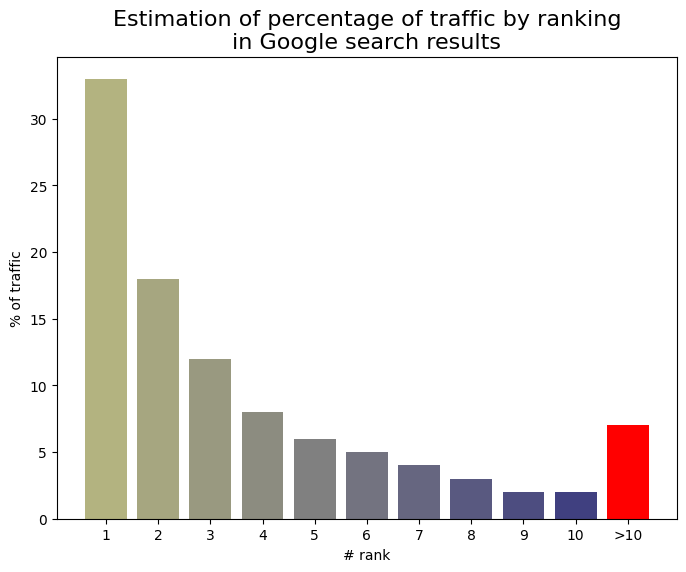

In [ ]:
# Estimation of percentage of traffic by google results position
traffic = {1: 0.33,
           2: 0.18,
           3: 0.12,
           4: 0.08,
           5: 0.06,
           6: 0.05,
           7: 0.04,
           8: 0.03,
           9: 0.02,
           10: 0.02}

# Display the percentage of traffic with colors
colors = []
for i in range(10):
    xc = round(0.7-0.05*i,2)
    c = (xc,xc,0.5)
    colors.append(c)
colors = colors + ["red"]

x = [str(t) for t in range(1,11)] +[">10"]
y = [traffic[key]*100 for key in traffic.keys()]
y += [100-sum(y)]

plt.figure(figsize=(8,6))
plt.bar(x,y, color = colors)
plt.title("Estimation of percentage of traffic by ranking\nin Google search results", fontsize = 16)
plt.xticks(x)
plt.xlabel("# rank")
plt.ylabel("% of traffic")
plt.show()


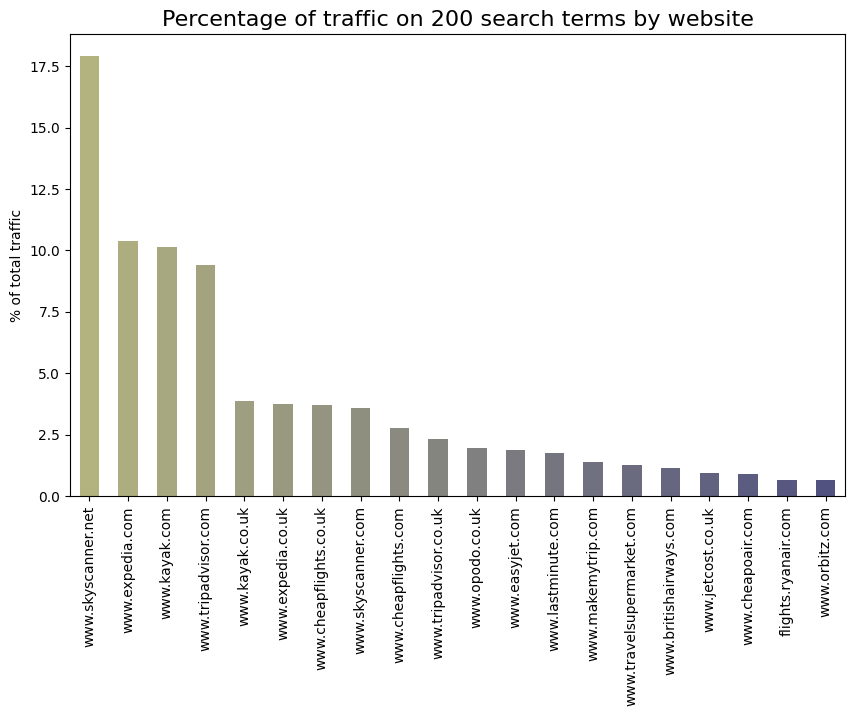

In [ ]:
#Select the columns we will use
df = df[["searchTerms", "rank", "title", "snippet", "displayLink"]].copy()

# Calculate the percentage of the total traffic by website
df["traffic%"] = df["rank"].map(traffic)
byTraffic = pd.pivot_table(df, values = "traffic%", index = "displayLink", aggfunc = "sum").sort_values("traffic%", ascending = False)
nb_terms = df["searchTerms"].nunique()

byTraffic["traffic%"] = byTraffic["traffic%"].apply(lambda x: (100/2) * (x/nb_terms))

# Display the percentage of the total traffic by website
# Supposing that each term has an equal amount of traffic
# what isn't true. It is the only way get an estimation,
# because the dataset doesn't have the amount of traffic
# by search term.

# number of top websites to plot
nb_website = 20

# Display the result with colors
colors = []
for i in range(nb_website):
    x = round(0.7-0.02*i,2)
    c = (x,x,0.5)
    colors.append(c)

plt.figure(figsize=(10,6))
plt.title(f"Percentage of traffic on {nb_terms} search terms by website", fontsize = 16)
byTraffic["traffic%"].iloc[:nb_website].plot.bar(color = colors)
plt.xlabel("")
plt.ylabel("% of total traffic")
plt.show()


In [ ]:
# List with the top 4 websites in average ranking
top4 = byTraffic["traffic%"].iloc[:4].index
top4

Index(['www.skyscanner.net', 'www.expedia.com', 'www.kayak.com',
       'www.tripadvisor.com'],
      dtype='object', name='displayLink')

Best keyword concentration to rank high

As we have seen before a slightly better ranking for a search term makes a huge difference in the traffic for the website. To jump between the second and the first rank doubles the traffic, and this can also double the profit. Therefore, we will have a look at the optimal quantity of keywords in the title and in the snippet to get a better ranking.

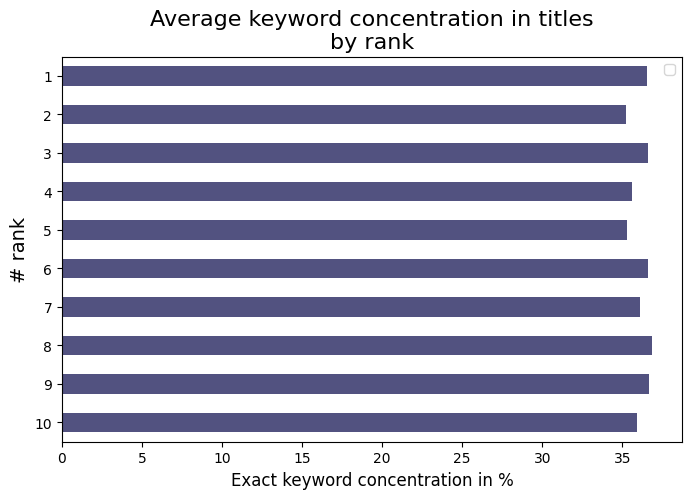

In [ ]:
# Calculate the % of keywords/search terms in the titles
df["%search_term_in_title"] = df["searchTerms"].apply(lambda x: len(x.split(" "))) / df["title"].apply(lambda x: len(x.split(" ")))
df["%search_term_in_title"] = 100 * df["%search_term_in_title"] # Convert the result in %

# Display the result
proc_searchterm_rank = pd.pivot_table(df, values = "%search_term_in_title", index = "rank", aggfunc = "mean").sort_index(ascending = False)
proc_searchterm_rank.plot.barh(figsize = (8,5), color = (0.32, 0.32, 0.5))
plt.legend("")
plt.xlabel("Exact keyword concentration in %", fontsize = 12)
plt.ylabel("# rank", fontsize = 14)
plt.title("Average keyword concentration in titles\nby rank", fontsize = 16)
plt.show()

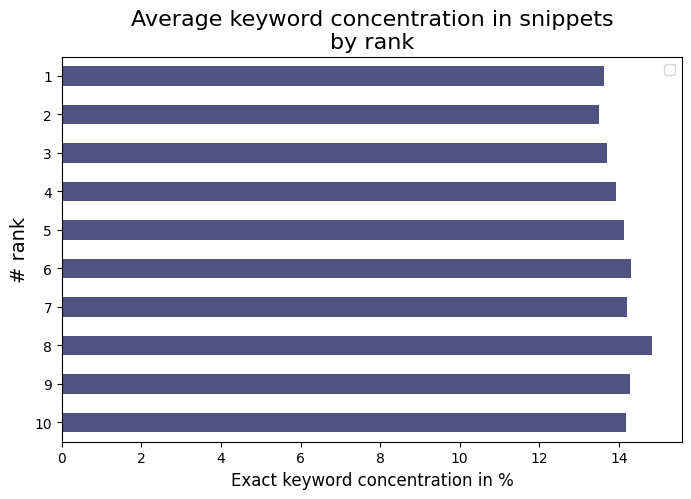

In [ ]:
# Calculate the % of keywords/search terms in the snippet
df["%search_term_in_snippet"] = df["searchTerms"].apply(lambda x: len(x.split(" "))) / df["snippet"].apply(lambda x: len(x.split(" ")))
df["%search_term_in_snippet"] = 100 * df["%search_term_in_snippet"] # Convert the result in %

# Display the result
proc_snippet_rank = pd.pivot_table(df, values = "%search_term_in_snippet", index = "rank", aggfunc = "mean").sort_index(ascending = False)
proc_snippet_rank.plot.barh(figsize = (8,5), color = (0.32, 0.32, 0.5))
plt.legend("")
plt.xlabel("Exact keyword concentration in %", fontsize = 12)
plt.ylabel("# rank", fontsize = 14)
plt.title("Average keyword concentration in snippets\nby rank", fontsize = 16)
plt.show()

Surprisingly the concentration of search terms in the title and snippet and very similar for each ranking. There is a fierce competition for the search terms in the dataset, therefore we can expect only high optimized websites to rank well. Maybe is this concentration of search terms an optimized one? We would need a dataset with more ranks than only the 10 first ones to analyze it.

Analysis of the changing average traffic

In this moment there are 24 csv files with the ranks for the same keywords, but they all have different dates. We can use them to analyse the evolution in the ranking of some websites.

In [ ]:
# Import and merge all the csv files
import os
lst_df_path = []
for dirname, _, filenames in os.walk('/content/drive/MyDrive/MyprojectT11/Google Search Analysis/data'):
    for filename in filenames:
        lst_df_path.append(os.path.join(dirname, filename))

# List the dates of the csv files
# Be aware that some months are missing
sorted([d[-14:-4] for d in lst_df_path ])

['2018-12-16',
 '2019-01-01',
 '2019-01-15',
 '2019-02-01',
 '2019-02-15',
 '2019-03-01',
 '2019-03-15',
 '2019-04-01',
 '2019-04-15',
 '2019-05-01',
 '2019-05-15',
 '2019-06-01',
 '2019-06-15',
 '2019-07-01',
 '2019-07-15',
 '2019-08-01',
 '2019-08-15',
 '2019-09-01',
 '2019-09-15',
 '2019-10-01',
 '2020-02-15',
 '2020-03-01',
 '2020-03-15',
 '2020-04-01']

In the following, the percentage of the total traffic by website (for the top 4) will be displayed supposing that each term has an equal amount of traffic what isn't true. It is the only way get an estimation because the datasets don't have the amount of traffic by search term.

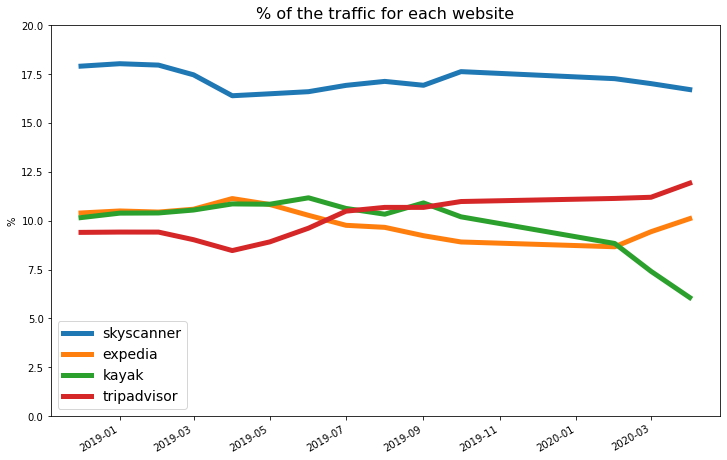

In [ ]:
# Charge all the datasets
lst_df = []
for d in range(len(lst_df_path)):
    lst_df.append(pd.read_csv(lst_df_path[d]))

# Merge all the dataset
all_df = pd.concat(lst_df)

# Reset index
all_df = all_df.reset_index().drop("index",axis = 1)

# Cut the year and the month of the date
# 2019-03-15 11:26:42.227730+00:00 => 2019-03

# Convert to datetime: datetime will automatically take the first day of each month
# 2019-03 => 2019-03-01
all_df["queryTime"] = pd.to_datetime(all_df["queryTime"].apply(lambda x: x[:7]))

# Select the columns we will use
all_df = all_df[["searchTerms", "rank","displayLink","queryTime"]].copy()

# Calculate the percentage of the total traffic by website
all_df["traffic%"] = all_df["rank"].map(traffic)

avg_rank_bymonth = pd.pivot_table(all_df,
                                  values = "traffic%",
                                  index = "displayLink",
                                  columns="queryTime",
                                  aggfunc="sum")

# Select the top 4 websites
avg_rank_bymonth = avg_rank_bymonth.loc[top4]

# Ajust the values to be in percentage
avg_rank_bymonth = avg_rank_bymonth*(100/2)/nb_terms

# For an unknown reason the values of some month are
# multiplicated by two
# Use an ad-hoc solution to fix it, dividing those
# values by two (if you find the issue, write me please)
min_avg = avg_rank_bymonth.sum(axis=0).min()
sum_avg = avg_rank_bymonth.sum(axis=0)
idx_change = sum_avg[sum_avg >= 2*min_avg].index
avg_rank_bymonth[idx_change] /= 2

# Transpose the dataframe to be able to plot it well
avg_rank_bymonth = avg_rank_bymonth.transpose()

# Rename the columns: www.skyscanner.com => skyscanner
new_column_names = [c.split(".")[1] for c in avg_rank_bymonth.columns]
avg_rank_bymonth.columns = new_column_names

# Display the results
# Be aware that some months are missing
# even if it isn't obvious on the graphic
avg_rank_bymonth.plot(figsize = (12,8), lw = 5)
plt.title("% of the traffic for each website", fontsize = 16)
plt.ylabel("%")
plt.ylim(0, avg_rank_bymonth.max().max()+2)
plt.xlabel("")
plt.legend(fontsize = 14)
plt.show()
